In [4]:
#import user modules
import utils.helper_functions as hfun
import config as cf
import modules.thouless_times as thouless
import costfun.costfun as cost
import importlib
importlib.reload(hfun)
importlib.reload(cf)
importlib.reload(thouless)
importlib.reload(cost)

from utils.fit_functions import *

#--- importet matplotlib
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib
%matplotlib inline


#--- mathematics and data modules
import numpy as np
import pandas as pd
import random
import scipy.stats as stats

#--- other modules
import os
import warnings
warnings.filterwarnings('ignore')

import copy
from scipy.special import erf
from scipy.special import binom
from scipy.optimize import curve_fit as fit

print(cf.base_directory)


user_settings = getattr(cf.plot_settings, 'settings')
a = np.array([[0, 1, 0, 1, 2],
       [2, 3, 3, 2, 7]])
print(a[0])
print(np.transpose(a)[0])

../results/HEISENBERG/disorder/PBC/
[0 1 0 1 2]
[0 2]


In [5]:

def typical(data):
    return np.exp(np.sum(np.log(data) / len(data)))

basedir = "./CriticalParameters/"
sizes = range(12, 19, 2)
def load_critical_data(crit_fun = 'free', scaling_ansatz = 'FGR', set_class = None, name = "GapRatio"):
    if set_class is None: set_class = cf.plot_settings
    settings = getattr(set_class, 'settings')
    vs = settings['vs']

    cost_fun = []
    crit_exp = []
    crit_exp2 = []
    crit_pars = []
    critical_fun = cost.crit_functions_dict[crit_fun]
    for file in os.listdir(basedir):
        info = hfun.remove_info(hfun.info_param(cf.params_arr), settings['scaling'], settings['vs'])
        prefix = name + info + "_critfun=%s_ansatz=%s_pert=%s_seed"%(crit_fun, scaling_ansatz, vs)
        
        if file.startswith(prefix):
            file = basedir + file
            if os.path.exists(file):
                data = np.load(file)
                cost_fun.append(data['costfun'])
                crit_exponents = data["crit exp'"]
                if scaling_ansatz == 'FGR'  or scaling_ansatz == 'spacing':
                    crit_exp.append(crit_exponents[0])
                    if len(crit_exponents) > 1:
                        crit_exp2.append(crit_exponents[1])
                else:
                    crit_exp.append(crit_exponents)
                critics = []
                for i in range(len(data) - 2):
                    critics.append(data["x_%d"%i])
                crit_pars.append(np.array(critics))
    num_of_sizes = len(crit_pars[0])
    crit_pars = np.transpose(crit_pars)
    return np.array(cost_fun), np.array(crit_exp), np.array(crit_exp2), np.array(crit_pars), num_of_sizes

set_class = copy.deepcopy(cf.plot_settings)
set_class.set_scaling('L')
set_class.set_vs('g')
settings = getattr(set_class, 'settings')
cost_fun, crit_exp, crit_exp2, crit_pars, num_of_crit = load_critical_data(set_class=set_class)



print(np.median(crit_exp), np.median(crit_exp2))
print([np.median(crit_pars[i]) for i in range(num_of_crit)])


1.6818073728553058 1.6546086905155557
[0.12122457964267369, 0.08820936133453372, 0.06402569331028143, 0.04583507181872598]


In [6]:

def plot_dist(vs = 'g', crit_fun = 'free', scaling_ansatz = 'FGR', name="GapRatio"):
    set_class = copy.deepcopy(cf.plot_settings)
    set_class.set_scaling('L')
    set_class.set_vs(vs)
    settings = getattr(set_class, 'settings')
    fig, (ax1, ax2, ax3, ax4) = plt.subplots( nrows=1, ncols=4, figsize=(14,4), dpi = 100, constrained_layout=True, sharey=False)    

    cost_fun, crit_exp, crit_exp2, crit_pars, num_of_crit = load_critical_data(crit_fun=crit_fun, scaling_ansatz=scaling_ansatz, set_class=set_class, name=name)

    ylab = hfun.var_name if settings['vs_idx'] == 2 else settings['vs']
    ax1.hist(crit_exp, bins = 40)
    ax1.set_title("critical exponent- " + r"$\nu$" + "\n -distribution")
    sizes = np.array(range(12, 19, 2))

    ax2.hist(crit_exp2, bins = 40)
    ax2.set_title("critical exponent- " + r"$\mu$" + "\n -distribution")
    
    for i in range(num_of_crit):
        ax3.hist(crit_pars[i], bins = 30, label=r"$L=%d$"%(sizes[i]), histtype='bar', linewidth=3, stacked=True)

    hist, edge = np.histogram((crit_pars[-1]), bins = 30)
    ax3.set_ylim( None, 1.5*max( hist ) )
    ax3.set_title(r"$%s_c$"%ylab + " distribution\n for each system size")


    for i in range(num_of_crit):
        ax4.hist(np.log10(crit_pars[i]), bins = 30, label=r"$L=%d$"%(sizes[i]), histtype='step', linewidth=3)
    
    ax4.set_title(r"$log_{10}%s_c$"%ylab + " distribution\n for each system size")
    hist, edge = np.histogram(np.log10(crit_pars[-1]), bins = 20)
    ax4.set_ylim( None, 1.5*max( hist ) )
    
    ax3.legend(fontsize=8)
    ax4.legend(fontsize=8, loc='upper left')
    print(typical(crit_exp))
    print([typical(crit_pars[i]) for i in range(num_of_crit)])
    lab = hfun.var_name if settings['vs_idx'] == 2 else vs
    fig.suptitle("Scaling ansatz:\t" + r"$%s$"%cost.scale_ansatz_label[scaling_ansatz](lab), fontsize=16)


# GAP RATIO

## DISTRIBUTION $w=0.7=const$

3.6297834365594728
[0.073176680114338, 0.06829891733032185, 0.05402165282807503, 0.04051612460550876]
1.6729839121854284
[0.0725929703034271, 0.061560519657309305, 0.048768402479656185, 0.036823195000139336]
1.638881486572962
[0.07673939333417318, 0.06830657436488637, 0.05399254852484308, 0.04049781282254456]
0.2754901986014801
[0.08072765727715958, 0.07442755263395362, 0.057894747807845294, 0.0430700819233776]


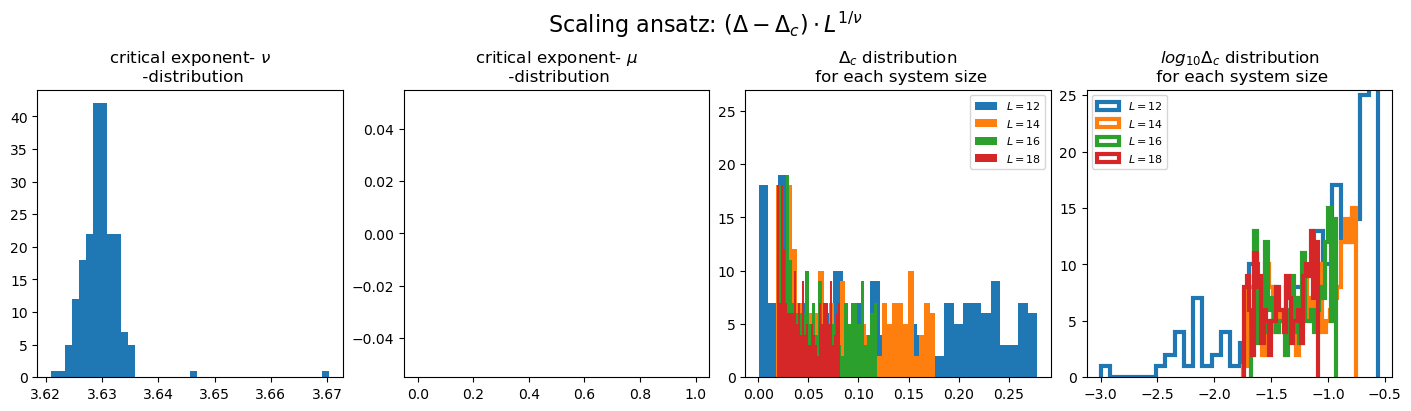

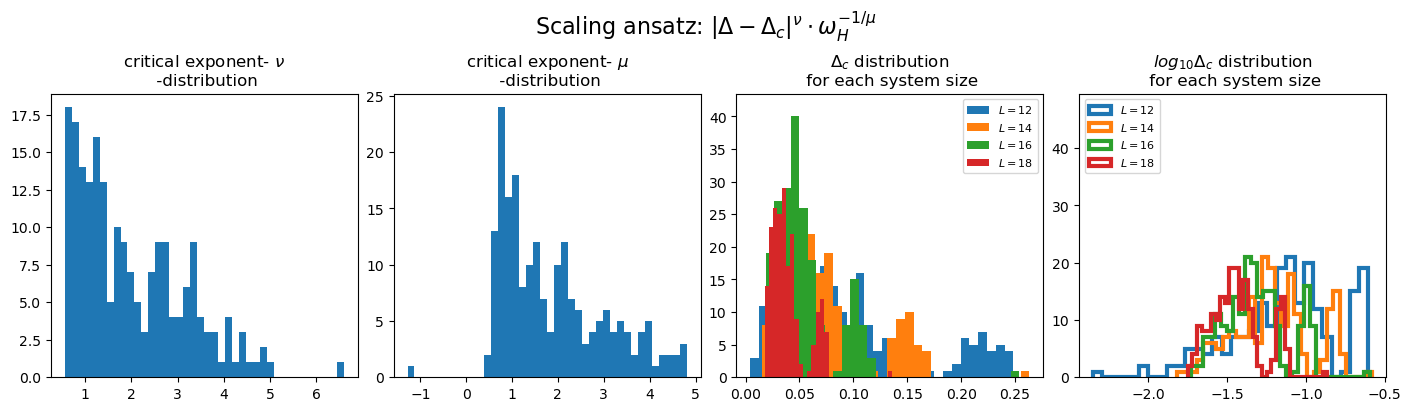

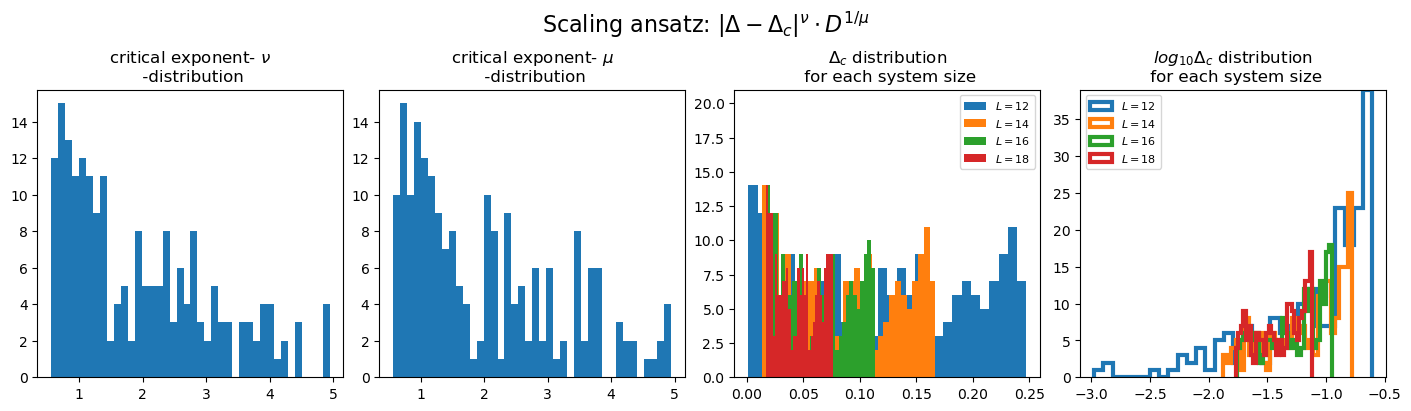

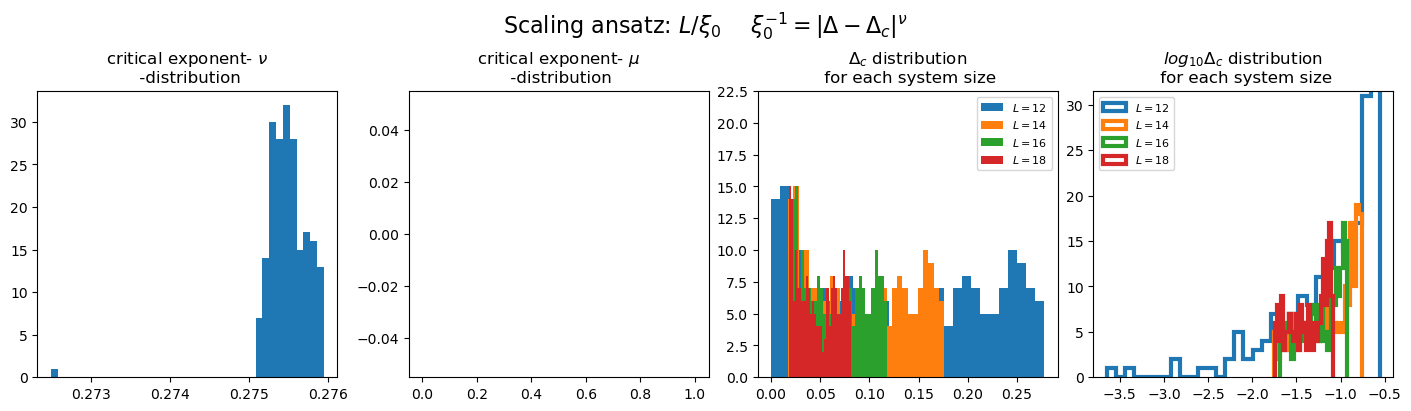

In [7]:
plot_dist(vs='g', scaling_ansatz='classic', crit_fun='free')
plot_dist(vs='g', scaling_ansatz='spacing', crit_fun='free')
plot_dist(vs='g', scaling_ansatz='FGR', crit_fun='free')
plot_dist(vs='g', scaling_ansatz='RG', crit_fun='free')

## DISTRIBUTIONS $\Delta=0.55=const$

4.683985559247268
[0.08043915544948954, 0.05991801573985575, 0.03956728893475309, 0.023803676667039166]
0.1998811523255875
[0.037562767062735, 0.009496922800916671, 0.08691817873850273, 0.022023675406207796]
1.6100555944381214
[0.11986674367550776, 0.07667879675663346, 0.04523381405561235, 0.02687564697252521]
0.21353019678262464
[0.10182103546521315, 0.06896841245675246, 0.04244000381040051, 0.02540505188653607]


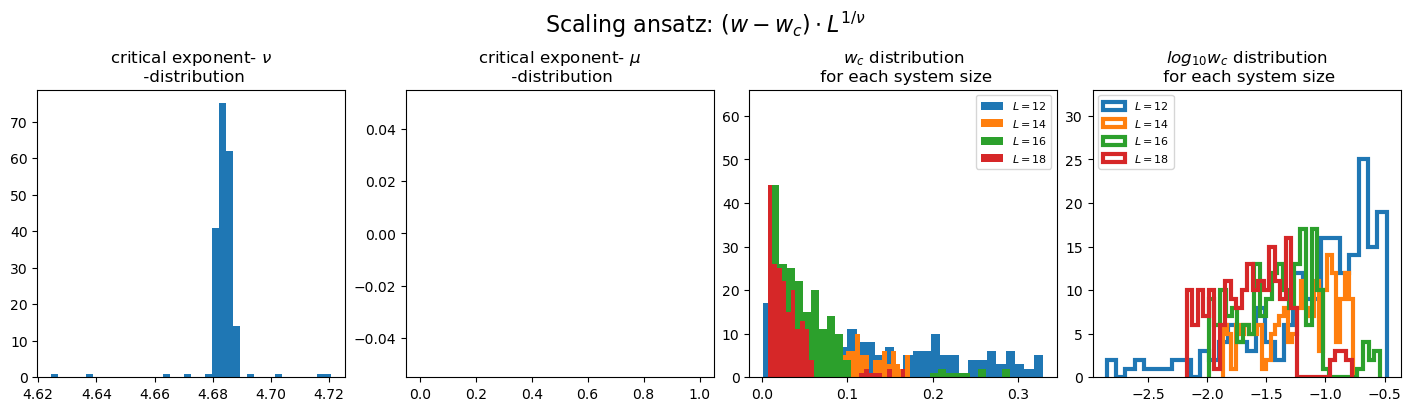

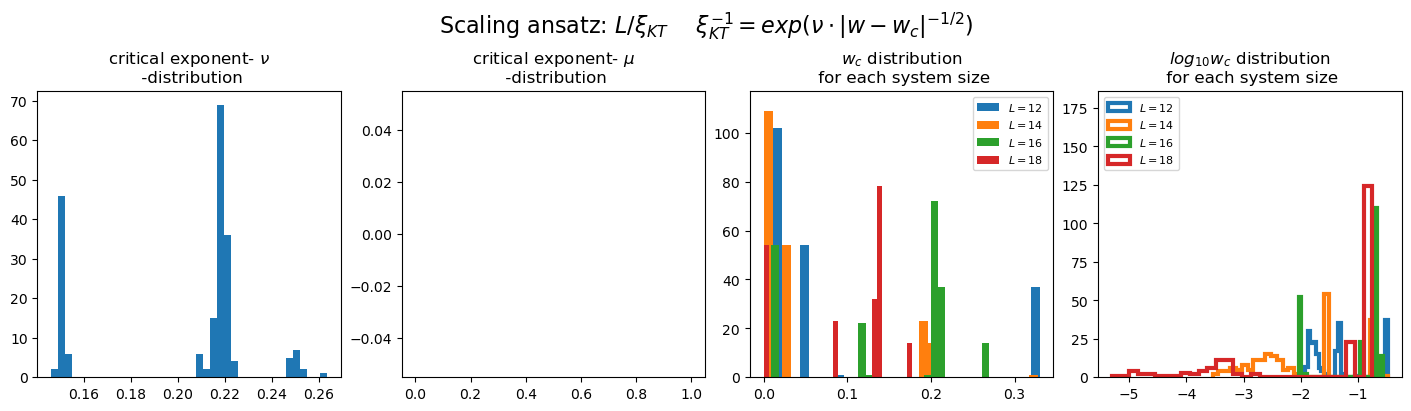

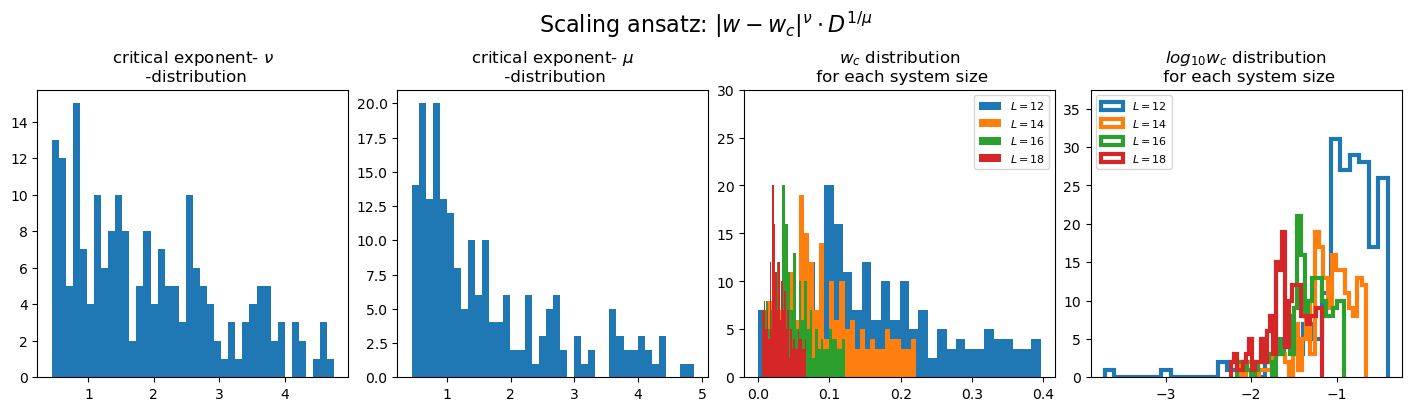

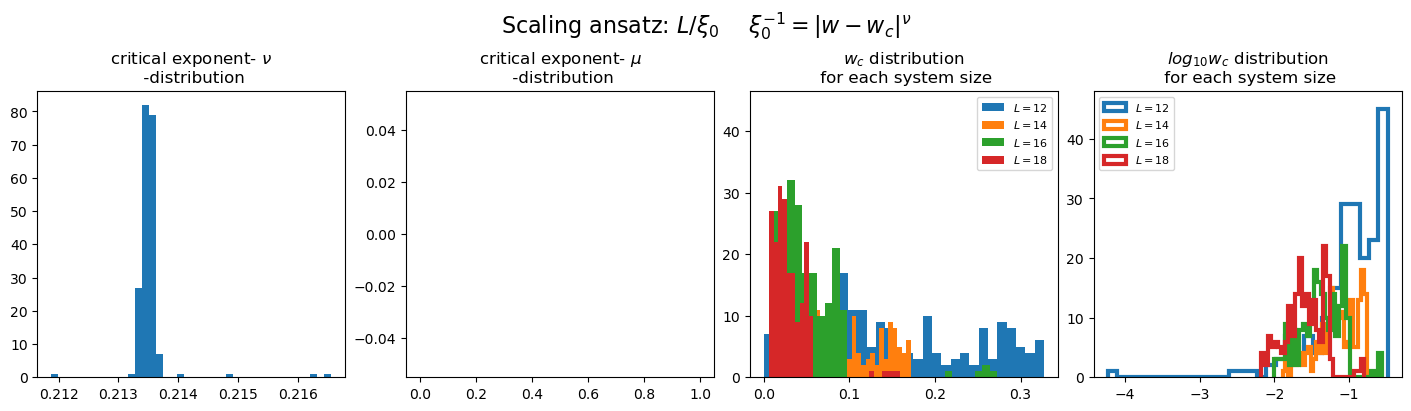

In [8]:

plot_dist(vs='w', scaling_ansatz='classic', crit_fun='free')
plot_dist(vs='w', scaling_ansatz='KT', crit_fun='free')
plot_dist(vs='w', scaling_ansatz='FGR', crit_fun='free')
plot_dist(vs='w', scaling_ansatz='RG', crit_fun='free')

## SCALING ANSAETZE PLOTTER

In [21]:
from regex import X


def plot_gaps(axis, vs = 'g', crit_fun = 'free', scaling_ansatz = 'FGR', name="GapRatio"):
    set_class = copy.deepcopy(cf.plot_settings)
    set_class.set_scaling('L')
    set_class.set_vs(vs)
    settings = getattr(set_class, 'settings')
    cost_fun, crit_exp, crit_exp2, crit_pars, num_of_sizes = load_critical_data(crit_fun=crit_fun, scaling_ansatz=scaling_ansatz, set_class=set_class, name=name)
    
    lab = hfun.var_name if settings['vs_idx'] == 2 else vs
    cost_fun = np.mean(cost_fun)
    crit_exp = np.median(crit_exp)
    crit_exp2 = np.median(crit_exp2)
    crit_pars = np.array([np.median(crit_pars[i]) for i in range(num_of_sizes)])
    
    xvals = []
    gap_ratio = []
    wH = []
    vals = range(12,19,2)
    for x in vals:
        cf.params_arr[settings['scaling_idx']] = x
        filename = cf.base_directory + "STATISTICS" + os.sep + hfun.remove_info(hfun.info_param(cf.params_arr), settings['vs']) + ".dat"
        
        idx_last = -1
        r_min = 0.0 
        if os.path.exists(filename):
            stats = hfun.read_python_saved_dat_file(filename)
            r_tmp = stats[1]
            xvals.append(np.array([stats[0][i] for i, r in enumerate(r_tmp) if r > r_min])[:idx_last])
            norm = 1 if name == "GapRatio" else x * np.log(2) / 2. + (0.5 - np.log(2)) / 2. - 0.5 
            idx_data = 1 if name == "GapRatio" else 4
            gap_ratio.append(np.array([stats[idx_data][i] for i, r in enumerate(r_tmp) if r > r_min])[:idx_last] / norm)
            wH.append(np.array([stats[5][i] for i, r in enumerate(r_tmp) if r > r_min])[:idx_last])

    xvals = np.array(xvals)
    #vals, xvals, tau, gap_ratio = thouless.load(settings=settings)
    rescale_fun = cost.resc_functions_dict[scaling_ansatz]
    critical_fun = cost.crit_functions_dict[crit_fun]

    x_min = 1e10
    x_max = -1e10

    g_c_dev_GOE = []

    def atan_rescaled(x, A, alfa, x_c):
        return (0.5307 - 0.3867) * A * (np.arctan(alfa * (x - x_c)) + np.pi / 2.) / np.pi + 0.3867
    def erf_rescaled(x, A, alfa, x_c):
        return (0.5307 - 0.3867) * A * (erf(alfa * (x - x_c)) + 2) / 2 + 0.3867
        
    for i in range(num_of_sizes):
        xpoints = []
        if scaling_ansatz == 'FGR':         
            xpoints = rescale_fun(xvals[i], vals[i], critical_fun, crit_exp, crit_exp2, *crit_pars)
        elif scaling_ansatz == 'spacing':   
            xpoints = rescale_fun(xvals[i], vals[i], critical_fun, crit_exp, *crit_pars) * np.array(wH[i])**(-1./crit_exp2)
        else:                               
            xpoints = rescale_fun(xvals[i], vals[i], critical_fun, crit_exp, *crit_pars)
            
        idx = 0
        var = 0
        while var < 0.525 and idx < xpoints.size - 1: 
            var = gap_ratio[i][idx];  idx += 1;
        g_c_dev_GOE.append(xvals[i][idx])
        
        
        axis.scatter(xpoints, gap_ratio[i], s=5)
        xxx = np.linspace(-1e6, 1e6, 10000)
        if i == num_of_sizes - 1:
            
            try:
                
                idx_nan = np.argwhere(np.isnan(gap_ratio[i]))
                xx = np.delete(xpoints, idx_nan)
                yy = np.delete(gap_ratio[i], idx_nan)
                pars, pcov = fit(f=atan_rescaled, 
                            xdata=xx, 
                            ydata=yy)
            except RuntimeError:
                pars = [0.5, 0.0, 0.0]
            axis.plot(xpoints, atan_rescaled(xpoints, *pars), linestyle = ':', color = 'black', label = 'atan fit')
            #try:
            #    pars, pcov = fit(f=erf_rescaled, 
            #                xdata=xpoints, 
            #                ydata=gap_ratio[i])
            #except RuntimeError:
            #    pars = [0.5, 0]
            #axis.plot(xpoints, atan_rescaled(xpoints, *pars), linestyle = '--', color = 'red', label = 'erf fit')

        idx = 0
        x = 0
        while x < 0.385:    x = gap_ratio[i][idx];  idx += 1;
        if idx < xpoints.size:
            if xpoints[idx] < x_min: x_min = xpoints[idx]
        else:
            x_min = min(xpoints)
        idx = 0
        x = 0
        while x < 0.525 and idx < xpoints.size:     
            x = gap_ratio[i][idx];  idx += 1;
        if idx < xpoints.size:
            if xpoints[idx] > x_max: x_max = xpoints[idx]

    x_min = 2.0 * x_min if x_min < 0 else 0.25 * x_min
    x_max = 1.5 * x_max if x_max > 0 else 0.5 * x_max
    if crit_fun == 'free_inv':
        crit_pars = np.array([1. / x for x in crit_pars])
    
    xlab = cost.scale_ansatz_label[scaling_ansatz](lab)

    ylalab = "r" if name == "GapRatio" else "S / S_{random}"
    hfun.set_plot_elements(axis = axis, ylabel = ylalab, xlabel = xlab, settings=settings, 
                            font_size=8, set_legend=True, xlim=(None, None), ylim=(None, None))
    axis.set_xscale('linear')
    axis.set_yscale('linear')
    
    if name == "GapRatio":
        axis.set_xlim(x_min, x_max)
        axis.set_ylim(0.37, 0.54)
        axis.axhline(y=0.5307, xmin=0.35, xmax = 1, ls='--', color='black')
        axis.axhline(y=0.3867, xmin = 0, xmax=0.35, ls='--', color='black')

    width = 0.4
    height = 0.4
    left, bottom, width, height = [1 - width, 0.15, width, height / 0.8]
    ax = hfun.add_subplot_axes(axis, [left, bottom, width, height])
    sizes = np.array([12 + 2 * i for i in range(num_of_sizes)])


    #p2 = ax.plot(sizes, g_c_dev_GOE, color='red', label=r"$%s_c$"%lab, linewidth=0, marker = 'o')
    
    #ax.plot(sizes, np.array(fit_func(sizes, 1.0, 1/3.)) / fit_func(sizes[0], 1.0, 1/3.) * crit_pars[0], linestyle='--', color='red', label=r"$\sqrt[3]{\omega_H}$")
    def plot_fit(crit, label = r"$%s^*$"%lab, plot_line = True, color = 'black'):
        wH_at_crit = []
        for i in range(num_of_sizes):
            idx = min(range(len(wH[i])), key=lambda j: abs(wH[i][j] - crit[i]))
            wH_at_crit.append(wH[i][idx])
        wH_at_crit = np.array(wH_at_crit)
        
        pars, pcov = fit(f=power_law, 
                            xdata=wH_at_crit[1:], 
                            ydata=crit[1:])
        #print(pars[1])
        fit_name = r"$\omega_H^{%.2f}$"%pars[0]
        
        if plot_line:
            ax.plot(wH_at_crit, wH_at_crit**0.5, linestyle='--', color='blue', label=r"$\sqrt{\omega_H}$")
        p = ax.plot(wH_at_crit, crit, color=color, label=label + fit_name, linewidth=0, marker = 'o')
        ax.plot(wH_at_crit, power_law(wH_at_crit, *pars), linestyle='--', color=p[0].get_color())
        
    plot_fit(crit = crit_pars, label = r"$%s^*\sim$"%lab, color = 'black')
    if name == "GapRatio":
        plot_fit(crit = g_c_dev_GOE, label = r"$%s_c\sim$"%lab, plot_line = False, color = 'red')
    
    if vs == 'g' and name == "Entropy":
        S_c_crossing = [0.083, 0.044, 0.031, 0.023]
        plot_fit(crit = S_c_crossing, label = r"$%s^S(L, L-2)\sim$"%lab, plot_line = False, color = 'green')

    hfun.set_plot_elements(axis = ax, ylabel = lab + "_c", xlabel = "\\omega_H", settings=settings, 
                            font_size=8, set_legend=False, xlim=(None, None), ylim=(None, None))

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width, box.height * 0.8])
    ax.legend(loc = 'upper center', bbox_to_anchor=(0.5, 1.65), frameon = True, fontsize = 8, ncol=1)
    #ax.set_xscale('linear')
    #ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%d"%x))
    #ax.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%d"%x))
    #ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%.2f"%x))
    #ax.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%.2f"%x))
    titlee = r"$CF=%.4f\qquad\nu=%.4f$"%(cost_fun, 1./crit_exp if scaling_ansatz == 'classic' else crit_exp )
    
    #if scaling_ansatz == 'spacing':
    #    crit_exp2 = -1. / crit_exp2

    if scaling_ansatz == 'FGR' or scaling_ansatz == 'spacing':
        titlee += r"$\quad\mu=%.4f$"%crit_exp2
    axis.set_title(titlee)

    print(scaling_ansatz + ':\t mu + nu', crit_exp + crit_exp2)


## SCALING ANSAETZE RESULTS

classic:	 mu + nu nan
RG:	 mu + nu nan
spacing:	 mu + nu 2.8490508889990442
FGR:	 mu + nu 2.966505569449878


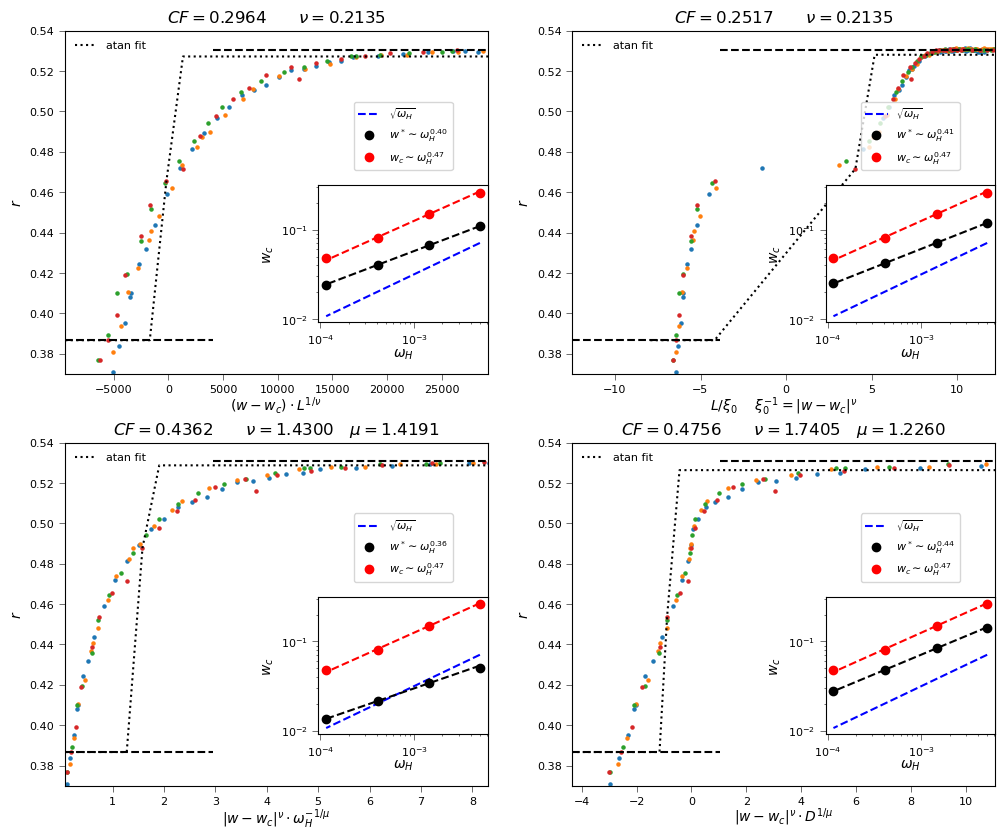

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( nrows=2, ncols=2, figsize=(12,10), dpi = 100)


plot_gaps(ax1, vs = 'w', scaling_ansatz='classic')
plot_gaps(ax2, vs = 'w', scaling_ansatz='RG')
plot_gaps(ax3, vs = 'w', scaling_ansatz='spacing')
#ax3.set_xlim(-1000, 20000)
plot_gaps(ax4, vs = 'w', scaling_ansatz='FGR')

#fig.subplots_adjust(wspace=0.4, hspace=0.2)


classic:	 mu + nu nan
RG:	 mu + nu nan
spacing:	 mu + nu 3.2689235618748302
FGR:	 mu + nu 3.3364160633708613


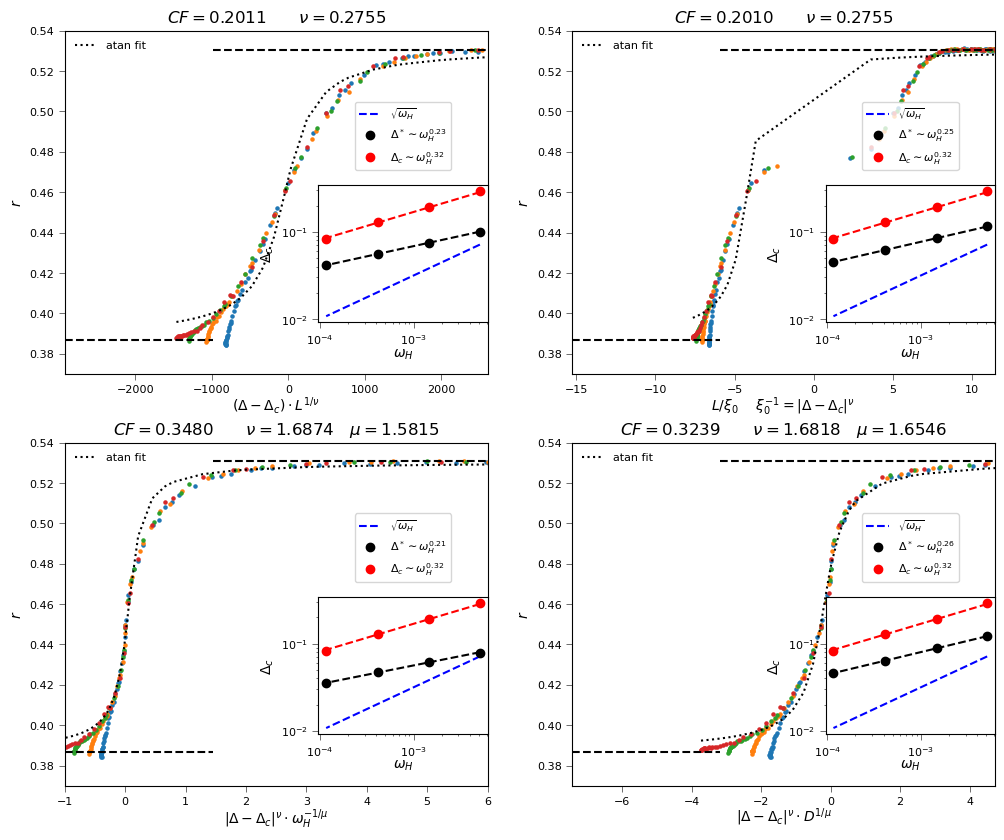

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( nrows=2, ncols=2, figsize=(12,10), dpi = 100)


plot_gaps(ax1, vs = 'g', scaling_ansatz='classic')
plot_gaps(ax2, vs = 'g', scaling_ansatz='RG')
plot_gaps(ax3, vs = 'g', scaling_ansatz='spacing')
ax3.set_xlim(-1, 6)
plot_gaps(ax4, vs = 'g', scaling_ansatz='FGR')

#fig.subplots_adjust(wspace=0.4, hspace=0.2)

# ----------------------------------------------------------------

# ENTROPY

## DISTRIBUTIONS $\Delta=0.55=const$

1.3650452313403814
[0.3376409842230667, 0.005971039861850544, 0.01649199131454594, 0.011981841677142816]
1.3054642844976152
[0.37222769866099975, 0.006605639542889737, 0.016408380274539208, 0.012162385089253993]


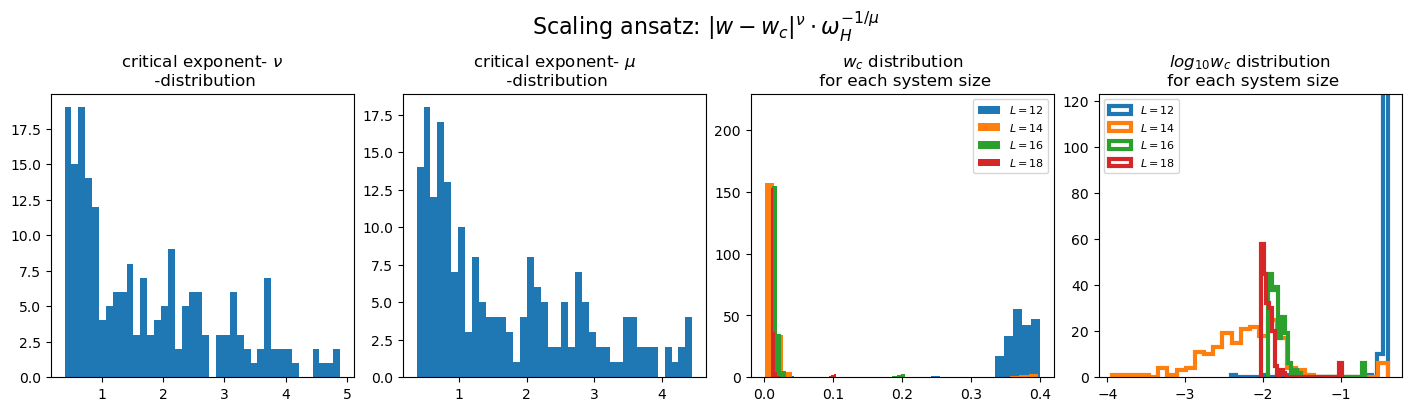

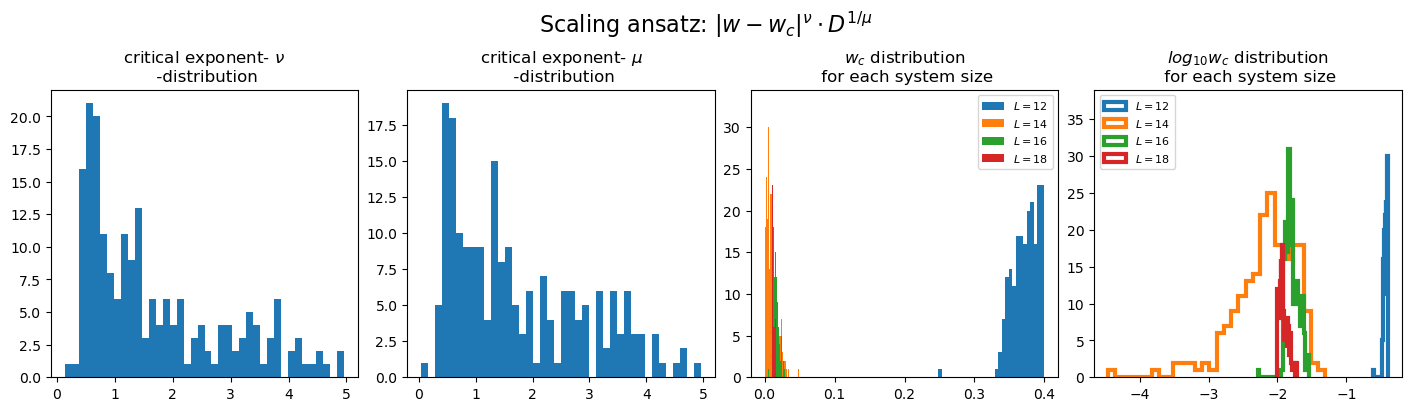

In [12]:

#plot_dist(vs='w', scaling_ansatz='classic', crit_fun='free', name="Entropy")
plot_dist(vs='w', scaling_ansatz='spacing', crit_fun='free', name="Entropy")
plot_dist(vs='w', scaling_ansatz='FGR', crit_fun='free', name="Entropy")
#plot_dist(vs='w', scaling_ansatz='RG', crit_fun='free', name="Entropy")

## DISTRIBUTION $w=0.7=const$

1.6545746837013047
[0.03694278578903375, 0.04545265674072559, 0.04097101846572655, 0.034737108478677246]
1.6878808398547773
[0.07226814832903569, 0.07142560688956812, 0.05851320658158787, 0.04582195600935912]
0.14089732694198212
[0.0691101916589344, 0.07323785032553508, 0.059689749780040116, 0.04750757669901881]
3.549897503421543
[0.08725377519162866, 0.07919992812595651, 0.06327233176278947, 0.048322714703557104]
0.2818366285223702
[0.09552828451297125, 0.0836727245750493, 0.06591480953043702, 0.049995662312158407]


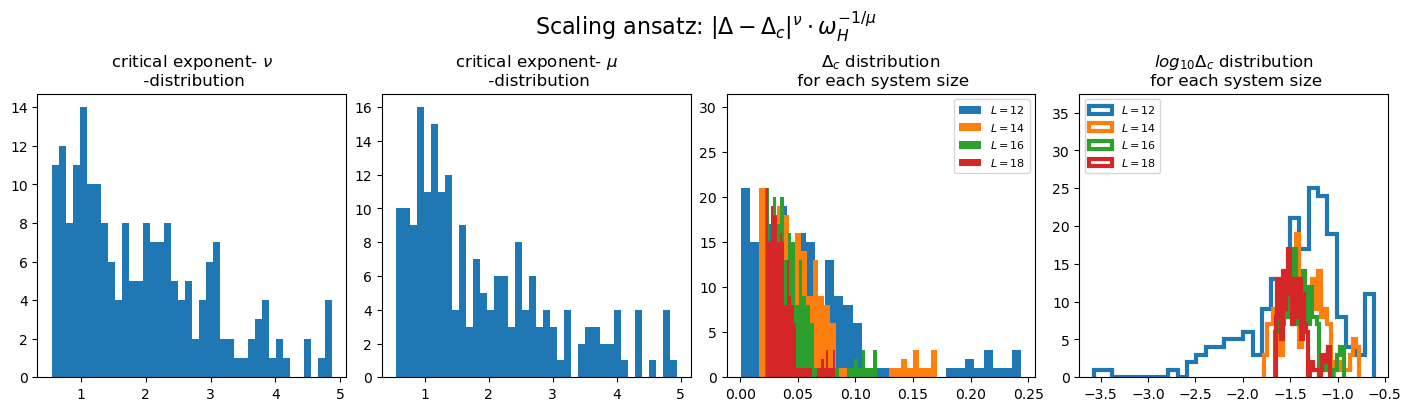

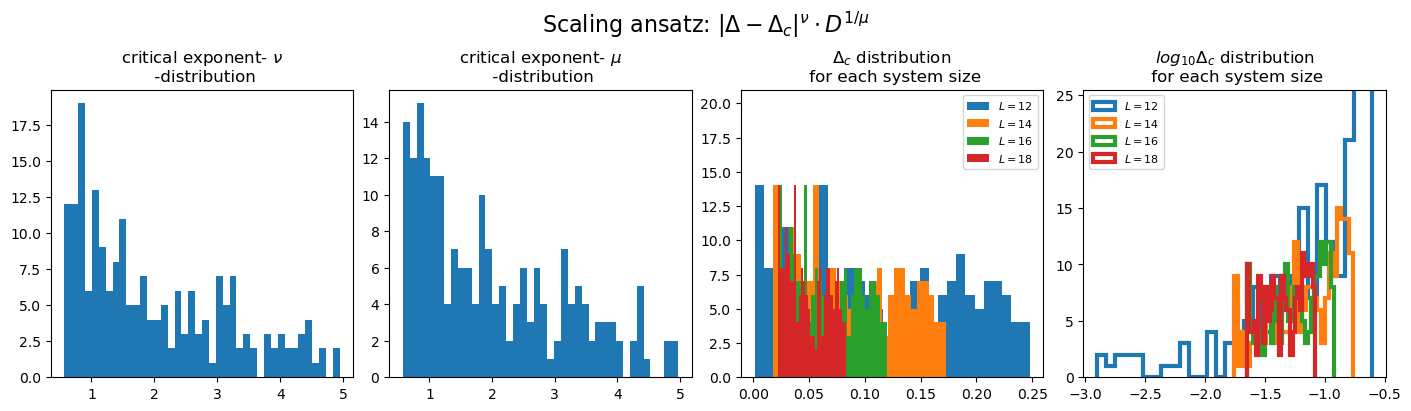

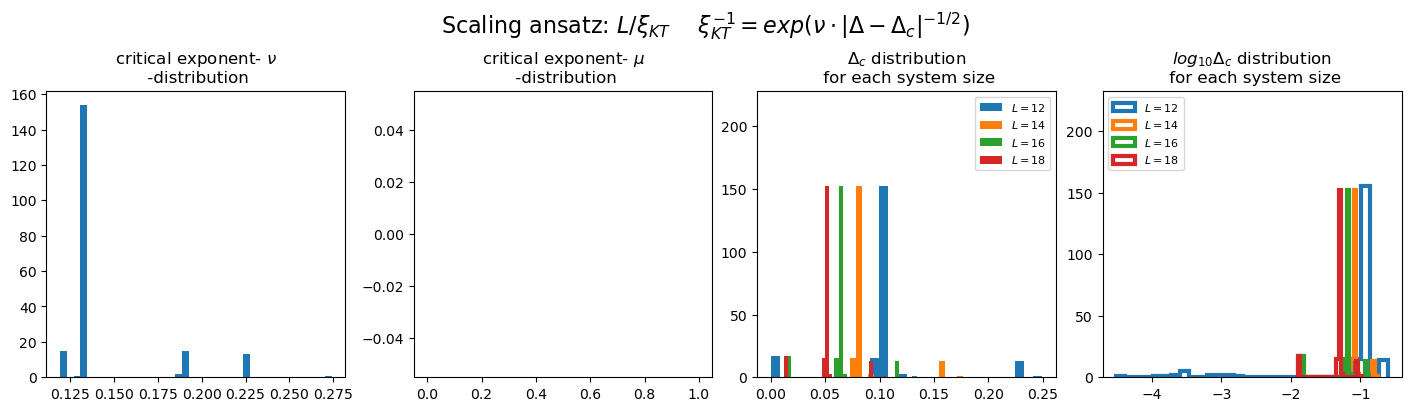

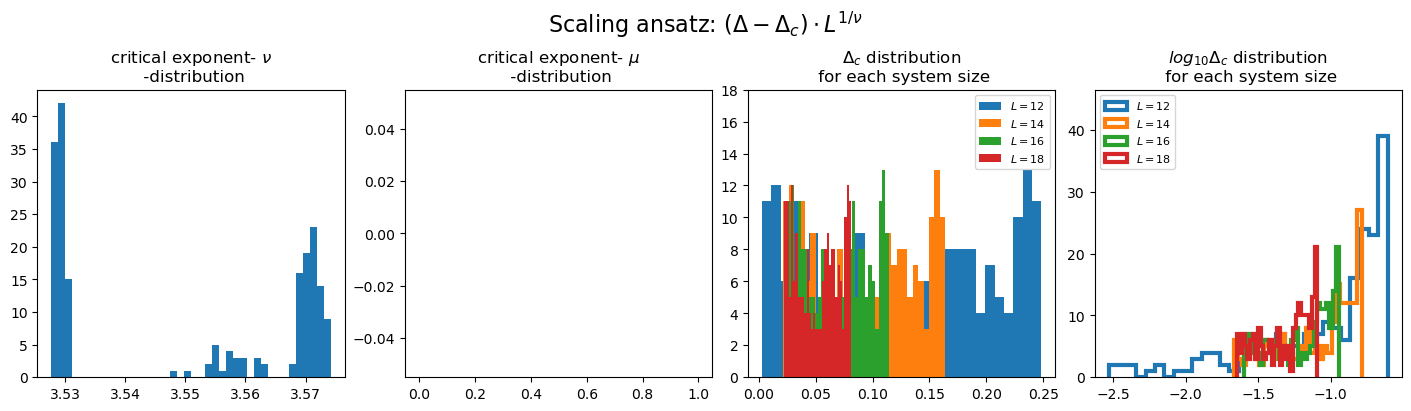

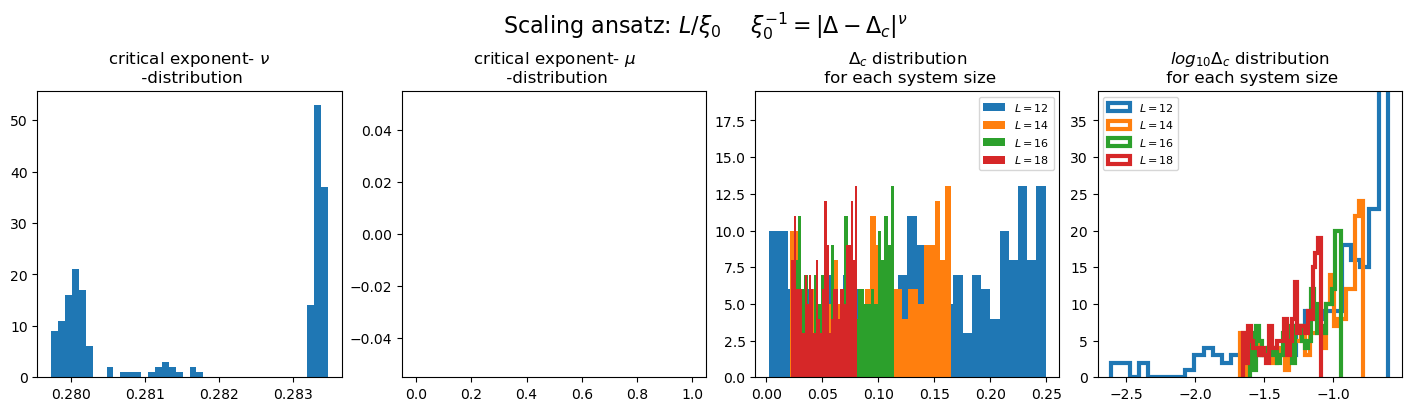

In [13]:
plot_dist(vs='g', scaling_ansatz='spacing', crit_fun='free', name="Entropy")
plot_dist(vs='g', scaling_ansatz='FGR', crit_fun='free', name="Entropy")
plot_dist(vs='g', scaling_ansatz='KT', crit_fun='free', name="Entropy")
plot_dist(vs='g', scaling_ansatz='classic', crit_fun='free', name="Entropy")
plot_dist(vs='g', scaling_ansatz='RG', crit_fun='free', name="Entropy")

## SCALING ANSAETZE RESULTS

spacing:	 mu + nu 2.697813484185555
FGR:	 mu + nu 2.6969441046293623


(-30.0, 200.0)

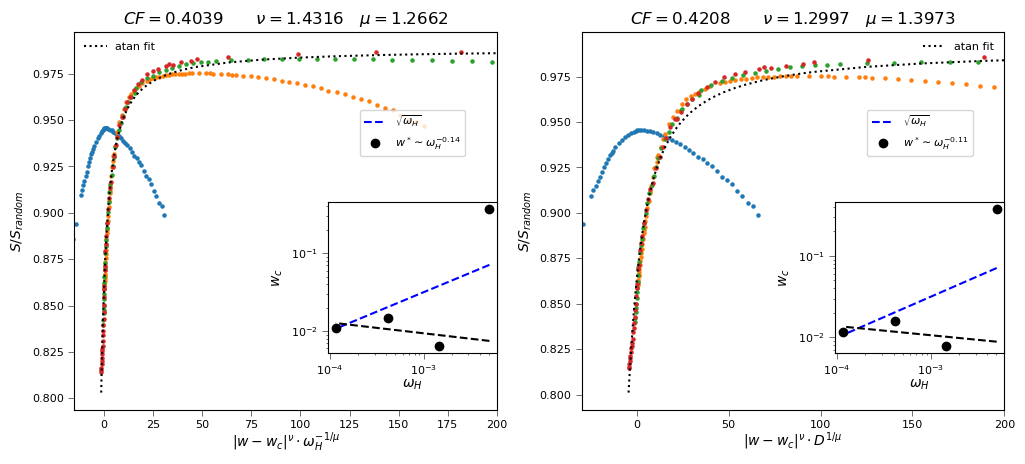

In [22]:
fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2, figsize=(12,5), dpi = 100)


#plot_gaps(ax1, vs = 'w', scaling_ansatz='classic', name="Entropy")
#plot_gaps(ax2, vs = 'w', scaling_ansatz='RG', name="Entropy")
plot_gaps(ax1, vs = 'w', scaling_ansatz='spacing', name="Entropy")
ax1.set_xlim(-15, 200)
plot_gaps(ax2, vs = 'w', scaling_ansatz='FGR', name="Entropy")
ax2.set_xlim(-30, 200)
#fig.subplots_adjust(wspace=0.4, hspace=0.2)


spacing:	 mu + nu 3.2947318775108965
FGR:	 mu + nu 3.371280036961197
KT:	 mu + nu nan
classic:	 mu + nu nan


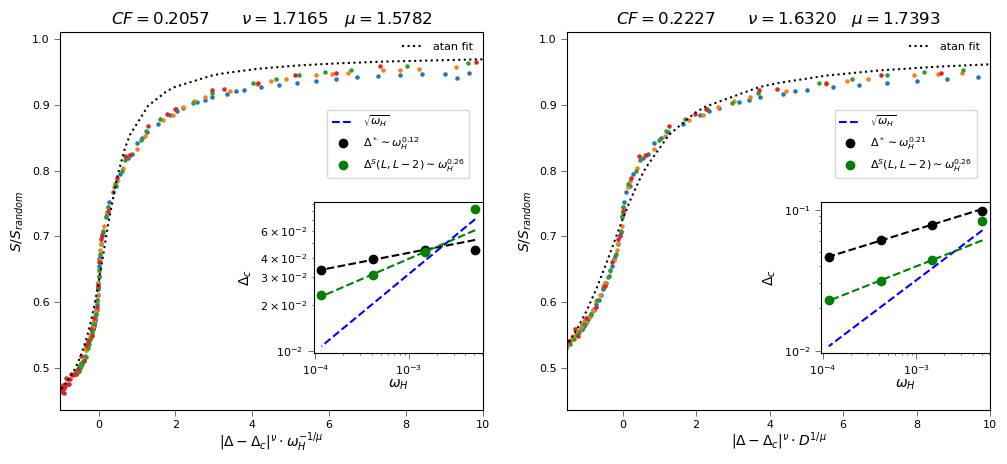

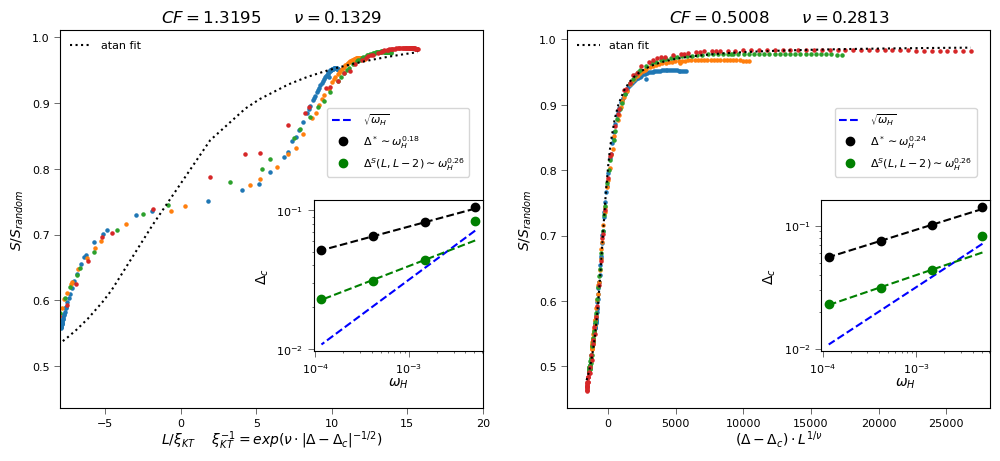

In [15]:
fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2, figsize=(12,5), dpi = 100)


plot_gaps(ax1, vs = 'g', scaling_ansatz='spacing', name="Entropy")
ax1.set_xlim(-1, 10)
plot_gaps(ax2, vs = 'g', scaling_ansatz='FGR', name="Entropy")
ax2.set_xlim(-1.5, 10)

fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2, figsize=(12,5), dpi = 100)
plot_gaps(ax1, vs = 'g', scaling_ansatz='KT', name="Entropy")
ax1.set_xlim(-8, 20)
plot_gaps(ax2, vs = 'g', scaling_ansatz='classic', name="Entropy")
#ax2.set_xlim(-8, 20)
#fig.subplots_adjust(wspace=0.4, hspace=0.2)